# Data Science z Python 3.10. Topologia sieci neuronowych
## 🇬🇧 Data Science with Python 3.10. Topology of a Neural Network
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek

In [3]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

# zaimportujemy biblioteki, które pozwolą nam na pracę podczas tego ćwiczenia
# musimy doinstalować tylko jedną z nich (mnist), która zawiera materiał treningowy oraz testowy

### 2. Funkcje aktywacji

W trakcie wykładu omawiane były funkcje aktywacji. Funkcje te cechują się różnymi właściwościami, które sprawiają, że mogą być one przydatne w zadaniach klasyfikacji do jednej z dwóch klas lub do ich większej ilości (np. softmax). Zanim zaczniemy nasze podstawowe zadanie napisz pozostałe funkcje aktywacji, korzystając z podanego szablonu.

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [4]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [5]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x))

[0.58427337 0.21928428 0.19644234]



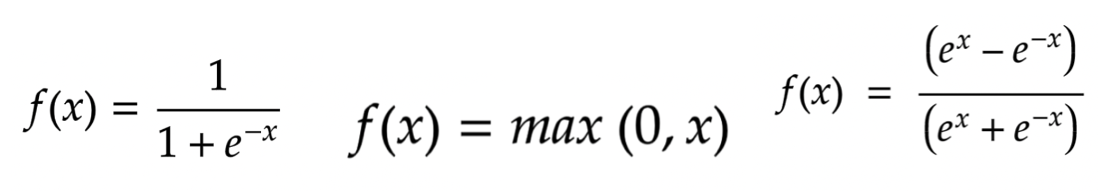

In [6]:
def sigmoid(y):
  # 🐞 w tym miejscu dokończ implementację funkcji sigmoidalnej przyjmującej y
  return 1/(1+np.exp(-y))
print(sigmoid(y))

0.8807970779778823


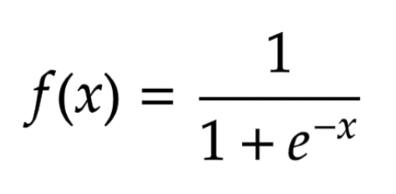

In [ ]:
def relu(a):
    return max(0,a)
print(relu(a))

0


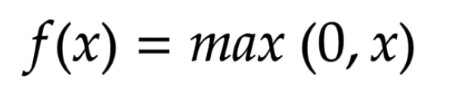

In [ ]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
print(tanh(z))

0.9993292997390669


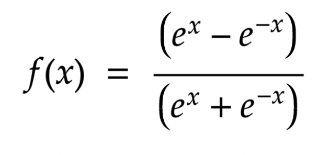

### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [7]:
train_images = mnist.train_images()
# 🐞 w tym miejscu dopisz trzy kolejne linie kodu, ale odnoszące się do labels (etykiet) oraz danych testowych (a nie treningowych)
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

Zanim przejdziemy dalej możemy podejrzeć nasze dane. Zastanówmy się do czego odnoszą się liczby 60000 oraz 28?

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
# 🐞 w tym miejscu dopisz trzy kolejne linie kodu, ale odnoszące się do kształtu etykiet oraz danych testowych

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 3.2. Normalizacja i "spłaszczenie" danych

Na tym etapie powinniśmy mieć stworzone cztery zmienne odnoszące się do materiału treningowego oraz etykiet (osobno dla zbioru treningowego i testowego). Zanim przejdziemy dalej musimy zadać jeszcze o normalizację. Co właściwie zamierzamy zrobić z naszymi danymi? Chcemy sprowadzić wartości pikseli z zakresu od 0-255 do nowego zakresu -0.5-0.5. Dlaczego to robimy?

In [8]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Możemy jeszcze raz podejrzeć nasze dane, ale na tym etapie jeszcze nic się nie zmieniło.

In [9]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Teraz dokonujemy "spłaszczenia" (flatten) naszych danych. Skąd się bierze wartość 784? (to po prostu 28*28 = 784). Każdy obraz w danych treningowych MNIST ma wymiary 28 x 28 (oraz informację odnoszącą się do skali szarości). Spłaszczymy każdy obraz 28x28 do 784-wymiarowego wektora, którego użyjemy jako danych wejściowych do naszej sieci neuronowej.

In [10]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Teraz widzimy, że kształt naszych danych zmienił.

In [11]:
print(train_images.shape)

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

Mamy już przygotowane dane, dokonaliśmy ich normalizacji oraz przeprowadziliśmy "spłaszczenie". Przechodzimy w końcu do etapu tworzenia architektury naszej sieci neuronowej. Wykorzystamy w tym celu klasę Sequential. Mamy do wyboru teraz kilka możliwości, które zależą od danych, które chcemy analizować. 

*   Zważywszy na to, że chcemy przeprowadzić "prostą" klasyfikację danych MNIST (jeszcze bez wykorzystania CNN) stworzymy sieć neuronową, która będzie składała się z warstw gęstych (Dense), w których każdy neuron będzie połączony z innym neuronem. 
*   Musimy tylko ustalić liczbę nodes oraz odpowiednią funkcję aktywacji.
*   Wskazujemy również odpowiednią wartość wejściową (input_shape).
*   Ostatnia wartość nodes odnosi się do ilości klas, ale jak ustalić wartość nodes w poprzednich warstwach?


In [12]:
from keras.layers import Dropout

model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

#### 3.4. Optymalizator, funkcja straty i metryki

W tym miejscu dokonujemy wyboru odpowiedniego optymalizatora, dobieramy funkcję straty oraz wskazujemy metryki, które wykorzystamy do oceny przydatności naszego modelu. Zagadnienia te zostaną poruszone na następnym wykładzie. 

In [13]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

W końcu przechodzimy do etapu trenowania przygotowanej przez nas architektury sieci neuronowej. Musimy jeszcze określić liczbę epok ("cykli trenowania sieci") oraz batch size. Pod koniec uzyskujemy informacje dotyczące straty walidacji oraz dokładności klasyfikacji.

In [14]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2772 - accuracy: 0.9158
Epoch 2/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1363 - accuracy: 0.9579
Epoch 3/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1051 - accuracy: 0.9667
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0862 - accuracy: 0.9726
Epoch 5/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0740 - accuracy: 0.9765


#### 4. Zadania do wykonania

##### 4.1. Zadanie 1.
Poszukaj informacji dotyczącej możliwości wygenerowania grafiki prezentującej architekturę sieci neuronowej i wstaw ją poniżej (z użytym kodem). Wykorzystaj architekturę sieci wykorzystaną na zajęciach.

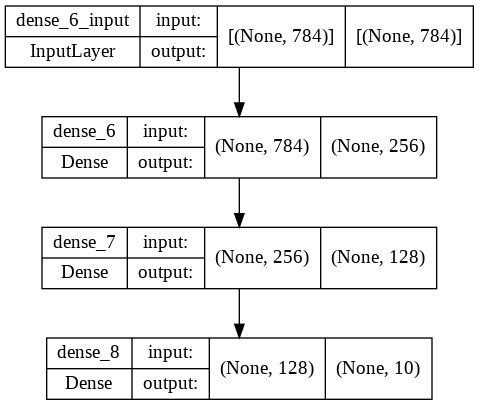

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


##### 4.2. Zadanie 2.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Podnieś liczbę epok do 100. Po jakim czasie obserwujesz okres stabilizacji dokładności klasyfikacji lub spadku jej wartości? Jak zachowuje się wartość validation loss?

In [ ]:
model_2 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)

Epoch 1/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2844 - accuracy: 0.9114
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1389 - accuracy: 0.9568
Epoch 3/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1077 - accuracy: 0.9663
Epoch 4/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0869 - accuracy: 0.9726
Epoch 5/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0750 - accuracy: 0.9758
Epoch 6/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9785
Epoch 7/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9805
Epoch 8/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9830
Epoch 9/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9836
Epoch 10/100
2000/2000 [==============================] - 7s 4ms/step - l

Dokładność klasyfikacji stabilizuje się w okolicach 18 epoki, gdzie zaczyna na przemian spadać i rosnąć, później aż do setnej epoki zmiany dokładności są nieznaczne.
Validation loss zachowuje ogólną tendencję spadkową, do 22/23 epoki wartość znacznie spada, później wzrasta i spada zależnie od epoki, utrzymując tendencję.

##### 4.3. Zadanie 3.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Pozostaw liczbę epok, ale zmodyfikuj wartość batch size określając ją na 20. Czy wpłynęło to na parametry końcowe modelu, czy nie miało związku?

In [15]:
model_3 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2880 - accuracy: 0.9111
Epoch 2/5
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1451 - accuracy: 0.9554
Epoch 3/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1109 - accuracy: 0.9646
Epoch 4/5
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0923 - accuracy: 0.9710
Epoch 5/5
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0800 - accuracy: 0.9749


W głównym modelu z zajęć osiągnięto następujące parametry:

loss: 0.0768 - accuracy: 0.9753

W modelu z obniżonym batch size osiągnięto następujące parametry:

loss: 0.0805 - accuracy: 0.9749

**Podsumowjąc wzrósł validation loss oraz nieznacznie spadło accuracy - pogorszyło to jakość nauczania.**

##### 4.4. Zadanie 4.
Zaproponuj inną architekturę sieci neuronowej. Zmień ilość warstw, zmodyfikuj ilość węzłów. Dodaj nowy typ warstwy Dropout (zob. więcej w tym miejscu - https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/). Czy udało Ci się osiągnąć lepsze parametry modelu?

In [24]:
model_4 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dropout(0.1),
  Dense(10, activation='softmax'),
])


model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_4.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 14s 4ms/step - loss: 0.3187 - accuracy: 0.9019
Epoch 2/5
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1618 - accuracy: 0.9512
Epoch 3/5
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1242 - accuracy: 0.9622
Epoch 4/5
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1082 - accuracy: 0.9677
Epoch 5/5
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0941 - accuracy: 0.9712


W głównym modelu z zajęć osiągnięto następujące parametry:

loss: 0.0768 - accuracy: 0.9753

W modelu poprawionym osiągnięto następujące parametry:

loss: 0.0941 - accuracy: 0.9712

Nie udało się uzyskać lepszych rezultatów.

##### 4.5. Zadanie 5.
Odtwórz dwie wyświetlone poniżej architektury sieci neuronowych (model_x) oraz (model_y). Określ funkcję aktywacji jako linear (również dla wyjścia sieci) i przeprowadź uczenie przy liczbie epok wynoszącej 10. Jak opisałbyś przebieg uczenia się? Dlaczego sieci neuronowe, pomimo ich zróżnicowania, zachowują się podobnie podczas trenowania i ich parametry (dokładność klasyfikacji, val loss) są takie same niezależnie od epoki?

In [ ]:
model_x = Sequential([
    Dense(256, activation='linear', input_shape=(784,)),
    Dense(256, activation='linear'),
    Dense(256, activation='linear'),
    Dense(128, activation='linear'),
    Dense(128, activation='linear'),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(64, activation='linear'),
    Dense(64, activation='linear'),
    Dense(10, activation='linear')
])


In [ ]:
print(model_x.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 256)               200960    
                                                                 
 dense_47 (Dense)            (None, 256)               65792     
                                                                 
 dense_48 (Dense)            (None, 256)               65792     
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dense_52 (Dense)            (None, 64)              

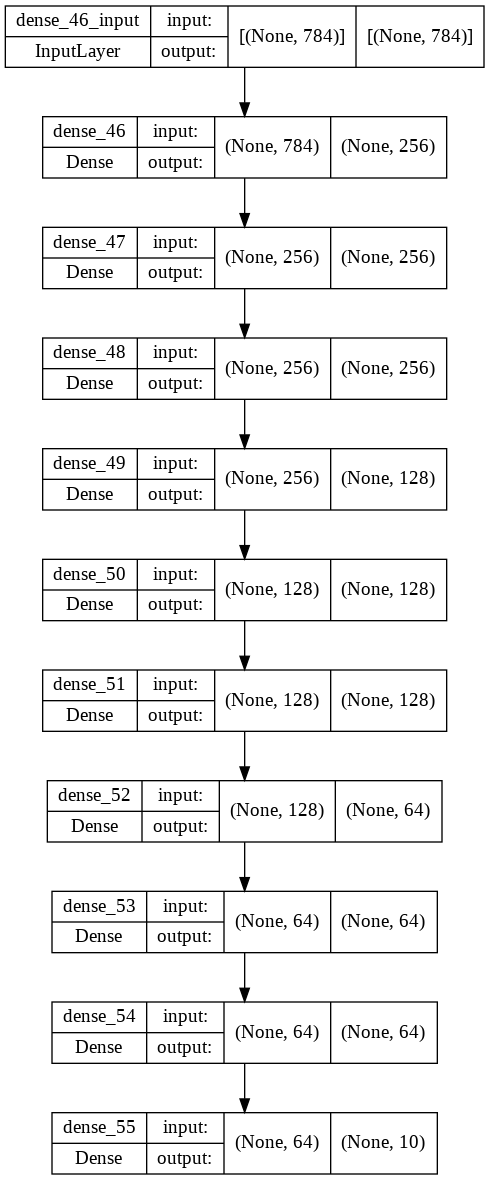

In [ ]:
plot_model(model_x, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_x.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_x.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 12s 6ms/step - loss: 9.8969 - accuracy: 0.1255
Epoch 2/10
2000/2000 [==============================] - 11s 5ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 3/10
2000/2000 [==============================] - 11s 6ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 4/10
2000/2000 [==============================] - 11s 6ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 5/10
2000/2000 [==============================] - 11s 6ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 6/10
2000/2000 [==============================] - 11s 6ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 7/10
2000/2000 [==============================] - 11s 6ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 8/10
2000/2000 [==============================] - 11s 6ms/step - loss: 9.9116 - accuracy: 0.1259
Epoch 9/10
2000/2000 [==============================] - 11s 5ms/step - loss: 9.9115 - accuracy: 0.1259
Epoch 10/10
2000/2000 [==============================] - 11s 6ms/step - l

ODPOWIEDŹ: 

In [ ]:
model_y = Sequential([
    Dense(256, activation='linear', input_shape=(784,)),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(10, activation='linear'),
])

In [ ]:
print(model_y.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               200960    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


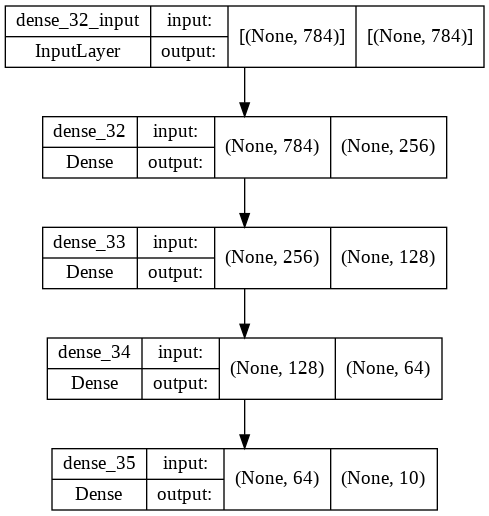

In [ ]:
plot_model(model_y, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_y.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_y.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.1665 - accuracy: 0.1127
Epoch 2/10
2000/2000 [==============================] - 7s 4ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 3/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 4/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 5/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 6/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 7/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 8/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 9/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.2334 - accuracy: 0.1124
Epoch 10/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.233

Odpowiedź: 
Każda epoka niezmiennie posiada takie same parametry: accuracy oraz validation loss na tym samym poziomie. Dzieje się tak ze względu na fakt, że pochodna funkcji liniowej, która jest funkcją aktywacji w każdej warstwie jest stała.
Technicznie można zamienić tę sieć na sieć o jednej warstwie. (ostatnia warstwa wciąż będzie funkcją liniową pierwszej warstwy). Sieci zachowują się podobnie ze względu na tą samą funkcję aktywacji.

